## Community Discovery
- Louvain
- Label Propagation
- Angel
- K-cliques

In [10]:
import warnings
import pandas as pd
import numpy as np
import cdlib
import networkx as nx
import matplotlib.pyplot as plt 
from cdlib import algorithms, evaluation, viz, ensemble
from collections import Counter


warnings.filterwarnings('ignore')


In [12]:
df = pd.read_csv("../data_collection/data_biden/df_per_grafo_pesato.csv", skipinitialspace=True, na_values='?', keep_default_na=True)   
del df['Unnamed: 0']
del df['id_source']
del df['id_target']

In [15]:
df.source = df.source.astype(str)
df.target = df.target.astype(str)

g = nx.from_pandas_edgelist(df, source="source", target = "target", create_using=nx.MultiDiGraph(), edge_attr = "weights")
#coverto il grafo diretto in indiretto
g = g.to_undirected() #multigrafo (più collegamenti tra gli stessi nodi)


In [212]:
list_size = []

In [211]:
def print_results(metodo, nome):
    '''Internal eval of communities'''
    print("Node coverage: ", metodo.node_coverage)
    print("Number of nodes: ", metodo.size())
    print("Average internal degree: ", metodo.average_internal_degree())
    print("Internal edge density: ", metodo.internal_edge_density())
    print("Conductance: ", metodo.conductance())
    print("Newman Girvan modularity: ", metodo.newman_girvan_modularity())
    
    list_size.append((nome, metodo.size(summary = False)))
    
def stampaCommunity (metodo):
    '''Print coms dimensions'''
    print("Comunita' totali: %d"%len(metodo.communities))
    nodes_l = []
    for i in metodo.communities:
        nodes_l += i
    nodes_l = list(set(nodes_l))
    print("Nodi: %d"%len(nodes_l))
    
def plot_boxplot(list_size):
    dati = []
    labels = []
    
    for i in range(len(list_size)):
        labels.append(list_size[i][0])
        dati.append(list_size[i][1])
    fig = plt.figure(figsize=(16,8), dpi= 300)
    ax = fig.add_subplot(111)
    plt.boxplot(dati, labels=labels)
    
    
    plt.xlabel('Algoritmi')
    plt.ylabel("Size")
    plt.grid(axis='both', alpha=.3)
    plt.title("Boxplot size")
    plt.yscale("log")

    plt.show()

### Louvain 
Assegna a ciascun nodo un cluster e poi li unisce per massimizzare la modularity (bottom up strategy)

In [36]:
resolution = ensemble.Parameter(name="resolution", start=0.1, end=1, step=0.1)
randomize = ensemble.BoolParameter(name="randomize")
communities_louvain, scoring_louvain = ensemble.grid_search(graph=g, method=algorithms.louvain,
                                            parameters=[resolution, randomize],
                                            quality_score=evaluation.erdos_renyi_modularity,
                                            aggregate=max)
print("Configuration: %s \nScoring: %s" %(communities_louvain.method_parameters, scoring_louvain))

Configuration: {'weight': 'weight', 'resolution': 0.7000000000000001, 'randomize': True} 
Scoring: FitnessResult(min=None, max=None, score=0.7283723092718605, std=None)


In [37]:
louvain_coms = algorithms.louvain(g, resolution = 0.7, weight = 'weights')

In [38]:
louvain_coms.method_parameters

{'weight': 'weights', 'resolution': 0.7, 'randomize': None}

In [39]:
louvain_coms.communities

[['JoeBiden',
  'kenjgld',
  'mcguirefilm',
  'MikeBloomberg',
  'ws121',
  'ScottPresler',
  'thesouthernrepo',
  'stephensacks',
  'shrayberin',
  'tophercarlton',
  'debdon98',
  'bluefox94',
  'skis416',
  'gordosmama',
  'cartapill',
  'rrogerston',
  'javs2z',
  'snukasuper',
  'paris_american',
  '1lida3',
  '27ump',
  'mytrueamerica',
  'phillynewscares',
  'mssasspot',
  'JakeScarberry88',
  'NFLFAQBS',
  'mrmdavidsonhot2',
  'mrpeabody323',
  'msbrisaqt',
  'kate_emilee',
  'mygreygardens',
  'pelosipoo',
  'pentuppower',
  'pennyforyourth2',
  'mydogissmarter_',
  'MarkRuffalo',
  'PeterAlexander',
  'mrkwolfe0',
  'nuvocare',
  'paconsultants1',
  'oreo078073',
  'only1party',
  'oneruffsea',
  'orateproinvicem',
  'odellscarborou4',
  'oshetjimmy',
  'outside77642598',
  'ogcoffeethatpay',
  'ncyo79',
  'patsycollins16',
  'foxnewsalert',
  'paolam1973',
  'passingmyway',
  'neeshnoosh',
  'ncirelli87',
  'nchantedkitty',
  'jeffzeleny',
  'WoobieTuesday',
  'pamelabwell',

In [40]:
louvain_coms.overlap

False

In [213]:
print_results(louvain_coms, "Louvain")

Node coverage:  1.0
Number of nodes:  FitnessResult(min=2, max=478, score=4.93960460569194, std=11.947993704781332)
Average internal degree:  FitnessResult(min=1.0, max=2.75, score=1.2958305982360045, std=0.31223740915090487)
Internal edge density:  FitnessResult(min=0.0043946211941791, max=1.0, score=0.7057671496972284, std=0.30905962008278975)
Conductance:  FitnessResult(min=0.0, max=0.9354838709677419, score=0.3268625523542587, std=0.24540806351234157)
Newman Girvan modularity:  FitnessResult(min=None, max=None, score=0.5584805898011956, std=None)


### Label Propagation 

In [29]:
labelProp_coms = algorithms.label_propagation(g)

In [31]:
labelProp_coms.communities

[['twinsistar',
  'trishacullen',
  'coppertime',
  'HillaryClinton',
  'mcguirefilm',
  'cdalytwt',
  'ncirelli87',
  'wepisknews',
  'scienceinvestme',
  'AmieWohrer',
  '777thehighchild',
  'cmiller28612445',
  'profaneprogress',
  'jjsubstrate',
  'ljkeith2016',
  'rip_heather',
  'RyanForgue',
  'NYGovCuomo',
  'thehillreport',
  'HeatherGautney',
  'surferlake',
  'mbrumagin',
  'bjaninemorison',
  'kdv10s',
  'janetmlsimons',
  'rmcgeddin',
  'USAinKSA',
  'pennyforyourth2',
  'lucysatane',
  'cartapill',
  'JoyfullyLa',
  'camorellconsult',
  'DemConvention',
  'prescott_l_j',
  'davidjlaurie',
  'dogwalk_media',
  'johncusackthe1',
  'davyd18',
  'annabella_fleur',
  'starbright489',
  'staylor2612',
  'winners786',
  'letsmoveonward',
  'AgnesAlston54',
  'nellvwiley',
  'thetruthiswhere',
  'MaggieRulli',
  'oshetjimmy',
  'younakahara1970',
  'unionyes19',
  'HomelandDems',
  'ajjaffe',
  'dominicandandy1',
  'WomanResistorNC',
  'jorge_c_ny',
  'jdesilva32',
  'loydmutua',

In [32]:
labelProp_coms.overlap

False

In [214]:
print_results(labelProp_coms, "Label Propagation")

Node coverage:  1.0
Number of nodes:  FitnessResult(min=2, max=1017, score=4.864569961489089, std=18.256664323176942)
Average internal degree:  FitnessResult(min=1.0, max=3.0, score=1.279865800286904, std=0.31097019934654724)
Internal edge density:  FitnessResult(min=0.0027969402054831643, max=1.0, score=0.7238722894197168, std=0.3015439481814524)
Conductance:  FitnessResult(min=0.0, max=0.8947368421052632, score=0.3200861023030764, std=0.2377617286905929)
Newman Girvan modularity:  FitnessResult(min=None, max=None, score=0.5672593891533252, std=None)


### Angel
Local Label Propagation

In [56]:
threshold = ensemble.Parameter(name="threshold", start=0, end=1, step=0.1)
size = ensemble.Parameter(name="min_community_size", start=3, end=5,step=1)

coms_angel, scoring_angel = ensemble.random_search(graph=g, method=algorithms.angel,
                                                       parameters=[threshold, size],
                                                       quality_score=evaluation.newman_girvan_modularity,
                                                        aggregate=max)

print("Configuration: %s \nScoring: %s" %(coms_angel.method_parameters, scoring_angel))

Configuration: {'threshold': 0.5, 'min_community_size': 3} 
Scoring: FitnessResult(min=None, max=None, score=0.0005241627084816376, std=None)


In [57]:
angel_coms = algorithms.angel(g, threshold=0.5, min_community_size=3)

In [58]:
angel_coms.communities

[['AOC',
  'CBS_Herridge',
  'CoriBush',
  'DailyMailUK',
  'DanaBashCNN',
  'ErinBurnett',
  'FBI',
  'GovAbbott',
  'GregAbbott_TX',
  'HardballChris',
  'HawleyMO',
  'IngrahamAngle',
  'JoaquinCastrotx',
  'JoeBiden',
  'JoeNBC',
  'JoyVBehar',
  'JudyWoodruff',
  'KamalaHarris',
  'MariaBartiromo',
  'NicolleDWallace',
  'PeteHegseth',
  'PressSec',
  'RaheemKassam',
  'RashidaTlaib',
  'RealCandaceO',
  'RepAOC',
  'RepDean',
  'RepDianaDeGette',
  'RepSwalwell',
  'RonDeSantisFL',
  'RudyGiuliani',
  'SandraSmithFox',
  'SenRonJohnson',
  'SenSchumer',
  'SenTomCotton',
  'SpeakerPelosi',
  'TheJusticeDept',
  'TomFitton',
  'TuckerCarlson',
  'WhiteHouse',
  'amieparnes',
  'andersoncooper',
  'billmaher',
  'blesamerica',
  'blesamerika',
  'brianstelter',
  'chucktodd',
  'csthetruth',
  'davidcicilline',
  'hodakotb',
  'jaketapper',
  'katiecouric',
  'maddow',
  'mitchellreports',
  'morningmika',
  'seanhannity'],
 ['ArnieVinic',
  'Corvaire_Wind',
  'JoeBiden',
  'KathyC

In [60]:
angel_coms.overlap

True

In [215]:
print_results(angel_coms, "Angel")

Node coverage:  0.006157364647930686
Number of nodes:  FitnessResult(min=3, max=56, score=8.722222222222221, std=12.232949837565553)
Average internal degree:  FitnessResult(min=1.3333333333333333, max=3.892857142857143, score=2.4661976911976913, std=0.9090448642969524)
Internal edge density:  FitnessResult(min=0.07077922077922078, max=0.8333333333333334, score=0.5592071508738174, std=0.2004896687157982)
Conductance:  FitnessResult(min=0.7647058823529411, max=0.9971264367816092, score=0.960902007890888, std=0.05391742021844063)
Newman Girvan modularity:  FitnessResult(min=None, max=None, score=0.0005241627084816376, std=None)


### Demon

In [62]:
threshold = ensemble.Parameter(name="epsilon", start=0, end=1, step=0.1)
size = ensemble.Parameter(name="min_com_size", start=3, end=5,step=1)

coms_demon, scoring_demon = ensemble.random_search(graph=g, method=algorithms.demon,
                                                       parameters=[threshold, size],
                                                       quality_score=evaluation.newman_girvan_modularity,
                                                        aggregate=max)

print("Configuration: %s \nScoring: %s" %(coms_demon.method_parameters, scoring_demon))

Configuration: {'epsilon': 0.4, 'min_com_size': 3} 
Scoring: FitnessResult(min=None, max=None, score=0.0008933688448139746, std=None)


In [63]:
demon_coms = algorithms.demon(g, epsilon=0.4, min_com_size=3)

In [64]:
demon_coms.communities

[['AOC',
  'CBS_Herridge',
  'CoriBush',
  'DailyMailUK',
  'DanaBashCNN',
  'ErinBurnett',
  'FBI',
  'GovAbbott',
  'GregAbbott_TX',
  'HardballChris',
  'HawleyMO',
  'IngrahamAngle',
  'JoaquinCastrotx',
  'JoeBiden',
  'JoeNBC',
  'JoyVBehar',
  'JudyWoodruff',
  'KamalaHarris',
  'MariaBartiromo',
  'NicolleDWallace',
  'PeteHegseth',
  'PressSec',
  'RaheemKassam',
  'RashidaTlaib',
  'RealCandaceO',
  'RepAOC',
  'RepDean',
  'RepDianaDeGette',
  'RepSwalwell',
  'RonDeSantisFL',
  'RudyGiuliani',
  'SandraSmithFox',
  'SenRonJohnson',
  'SenSchumer',
  'SenTomCotton',
  'SpeakerPelosi',
  'TheJusticeDept',
  'TomFitton',
  'TuckerCarlson',
  'WhiteHouse',
  'amieparnes',
  'andersoncooper',
  'billmaher',
  'blesamerica',
  'blesamerika',
  'brianstelter',
  'chucktodd',
  'csthetruth',
  'davidcicilline',
  'hodakotb',
  'jaketapper',
  'katiecouric',
  'maddow',
  'mitchellreports',
  'morningmika',
  'seanhannity'],
 ['ArnieVinic',
  'Corvaire_Wind',
  'JoeBiden',
  'KathyC

In [66]:
demon_coms.overlap

True

In [216]:
print_results(demon_coms, "Demon")

Node coverage:  0.0062453270000439815
Number of nodes:  FitnessResult(min=4, max=56, score=9.9375, std=12.793888922059626)
Average internal degree:  FitnessResult(min=2.5, max=3.892857142857143, score=3.016815476190476, std=0.4689875390199108)
Internal edge density:  FitnessResult(min=0.07077922077922078, max=0.8333333333333334, score=0.6048420932931803, std=0.22681565506449727)
Conductance:  FitnessResult(min=0.7872340425531915, max=0.9941642350979575, score=0.9564719230058989, std=0.054673561704890634)
Newman Girvan modularity:  FitnessResult(min=None, max=None, score=0.0009164347543525155, std=None)


### K- cliques

In [106]:
kclique_coms = algorithms.kclique(g, k=3)

In [107]:
kclique_coms.overlap 

True

In [217]:
print_results(kclique_coms, "K-cliques")

Node coverage:  0.007916611690196597
Number of nodes:  FitnessResult(min=3, max=56, score=6.114285714285714, std=9.32208262620515)
Average internal degree:  FitnessResult(min=2.0, max=3.892857142857143, score=2.4410204081632654, std=0.5788304858608715)
Internal edge density:  FitnessResult(min=0.07077922077922078, max=1.0, score=0.8241182902673586, std=0.24816384650146014)
Conductance:  FitnessResult(min=0.25, max=0.9959150326797386, score=0.9423836825639968, std=0.1308631859169543)
Newman Girvan modularity:  FitnessResult(min=None, max=None, score=0.0014070409147656604, std=None)


## Evaluation

In [109]:
stampaCommunity(louvain_coms)

Comunita' totali: 4603
Nodi: 22737


In [110]:
stampaCommunity(labelProp_coms)

Comunita' totali: 4674
Nodi: 22737


In [111]:
stampaCommunity(angel_coms)

Comunita' totali: 18
Nodi: 140


In [112]:
stampaCommunity(demon_coms)

Comunita' totali: 16
Nodi: 142


In [113]:
stampaCommunity(kclique_coms)

Comunita' totali: 35
Nodi: 180


### NMI

In [115]:
#the higher the NMI the more similar the compared partitons are
#Both partitions should cover the same node set
evaluation.normalized_mutual_information(louvain_coms, labelProp_coms)

MatchingResult(score=0.9453508287228441, std=None)

### NF1

In [120]:
louvain_coms.nf1(angel_coms)

MatchingResult(score=0.00033723518965493186, std=None)

In [121]:
louvain_coms.nf1(demon_coms)

MatchingResult(score=0.0003115868421104137, std=None)

In [122]:
louvain_coms.nf1(kclique_coms)

MatchingResult(score=0.0009520964588311971, std=None)

In [123]:
#anegl e demon matchano al 50%
angel_coms.nf1(demon_coms)

MatchingResult(score=0.55859375, std=None)

In [124]:
angel_coms.nf1(kclique_coms)

MatchingResult(score=0.25337301587301586, std=None)

In [125]:
labelProp_coms.nf1(angel_coms)

MatchingResult(score=0.00036200256739409486, std=None)

In [126]:
labelProp_coms.nf1(demon_coms)

MatchingResult(score=0.00030913520735637, std=None)

In [128]:
labelProp_coms.nf1(kclique_coms)

MatchingResult(score=0.000792531621333115, std=None)

### Community fitness/comparison visualization
Given one (or more) clustering it could be useful to visualize how a given fitness function distributes over the communities.



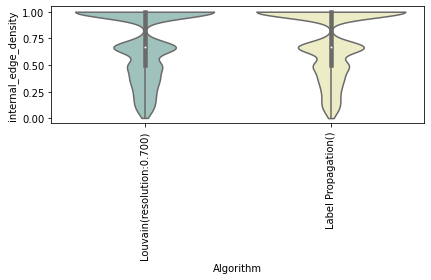

In [136]:
violinplot = viz.plot_com_stat([louvain_coms,labelProp_coms],evaluation.internal_edge_density)

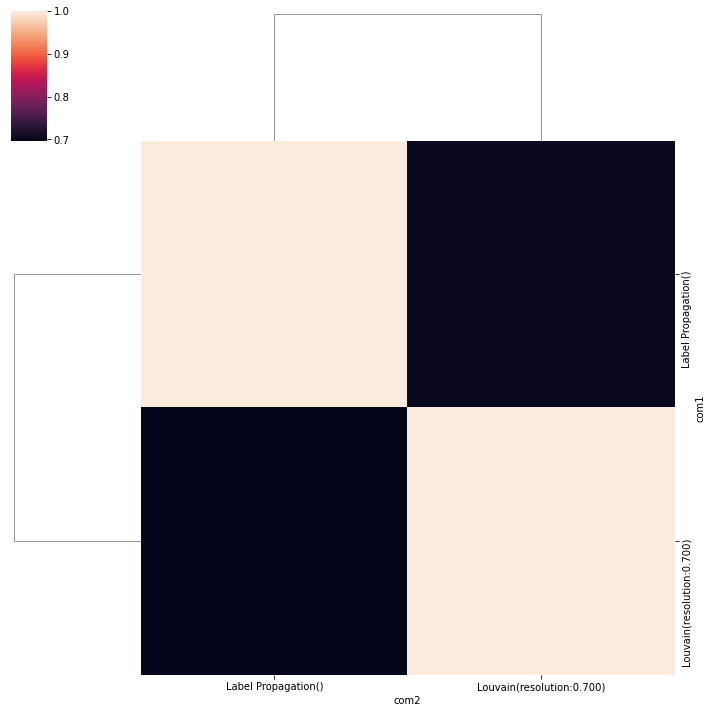

In [141]:
clustermap = viz.plot_sim_matrix([louvain_coms, labelProp_coms],evaluation.nf1)

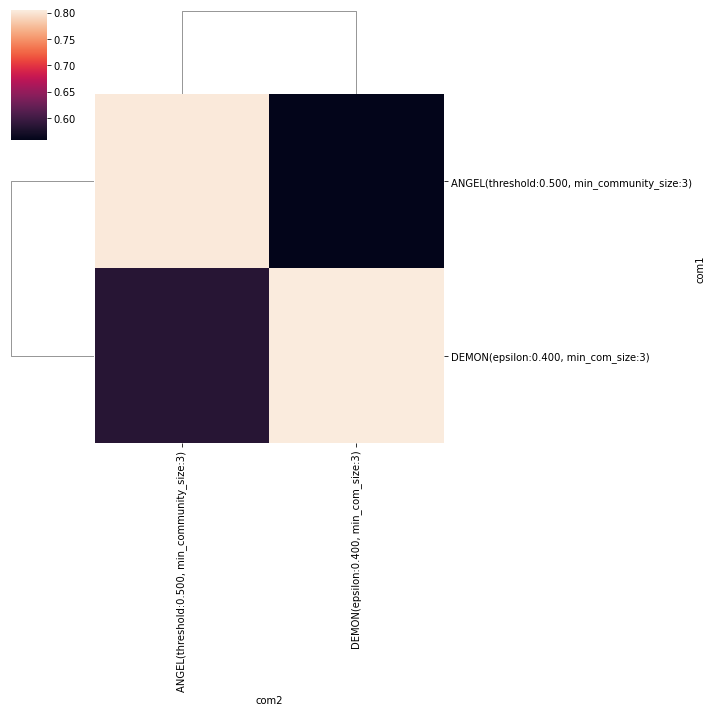

In [142]:
clustermap = viz.plot_sim_matrix([angel_coms, demon_coms],evaluation.nf1)

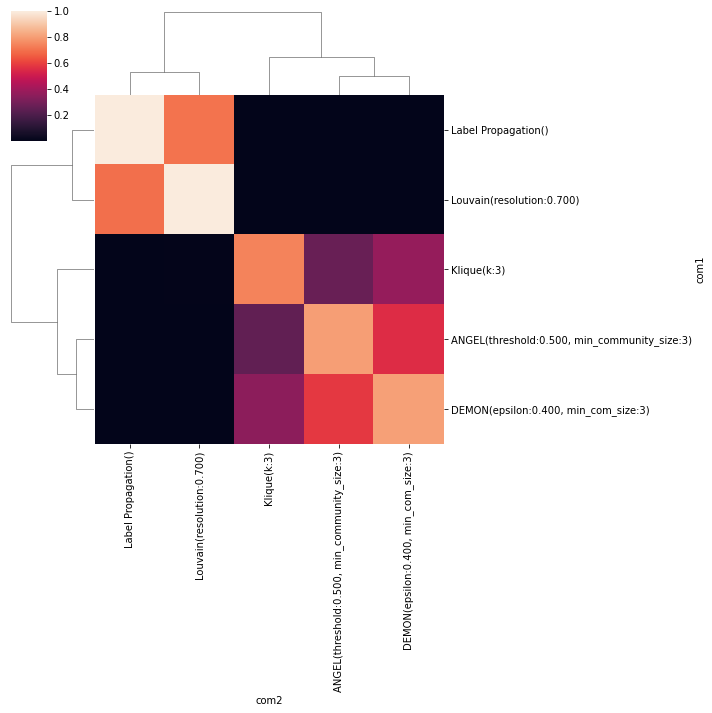

In [144]:
viz.plot_sim_matrix([louvain_coms, labelProp_coms, angel_coms, demon_coms, kclique_coms],evaluation.nf1)


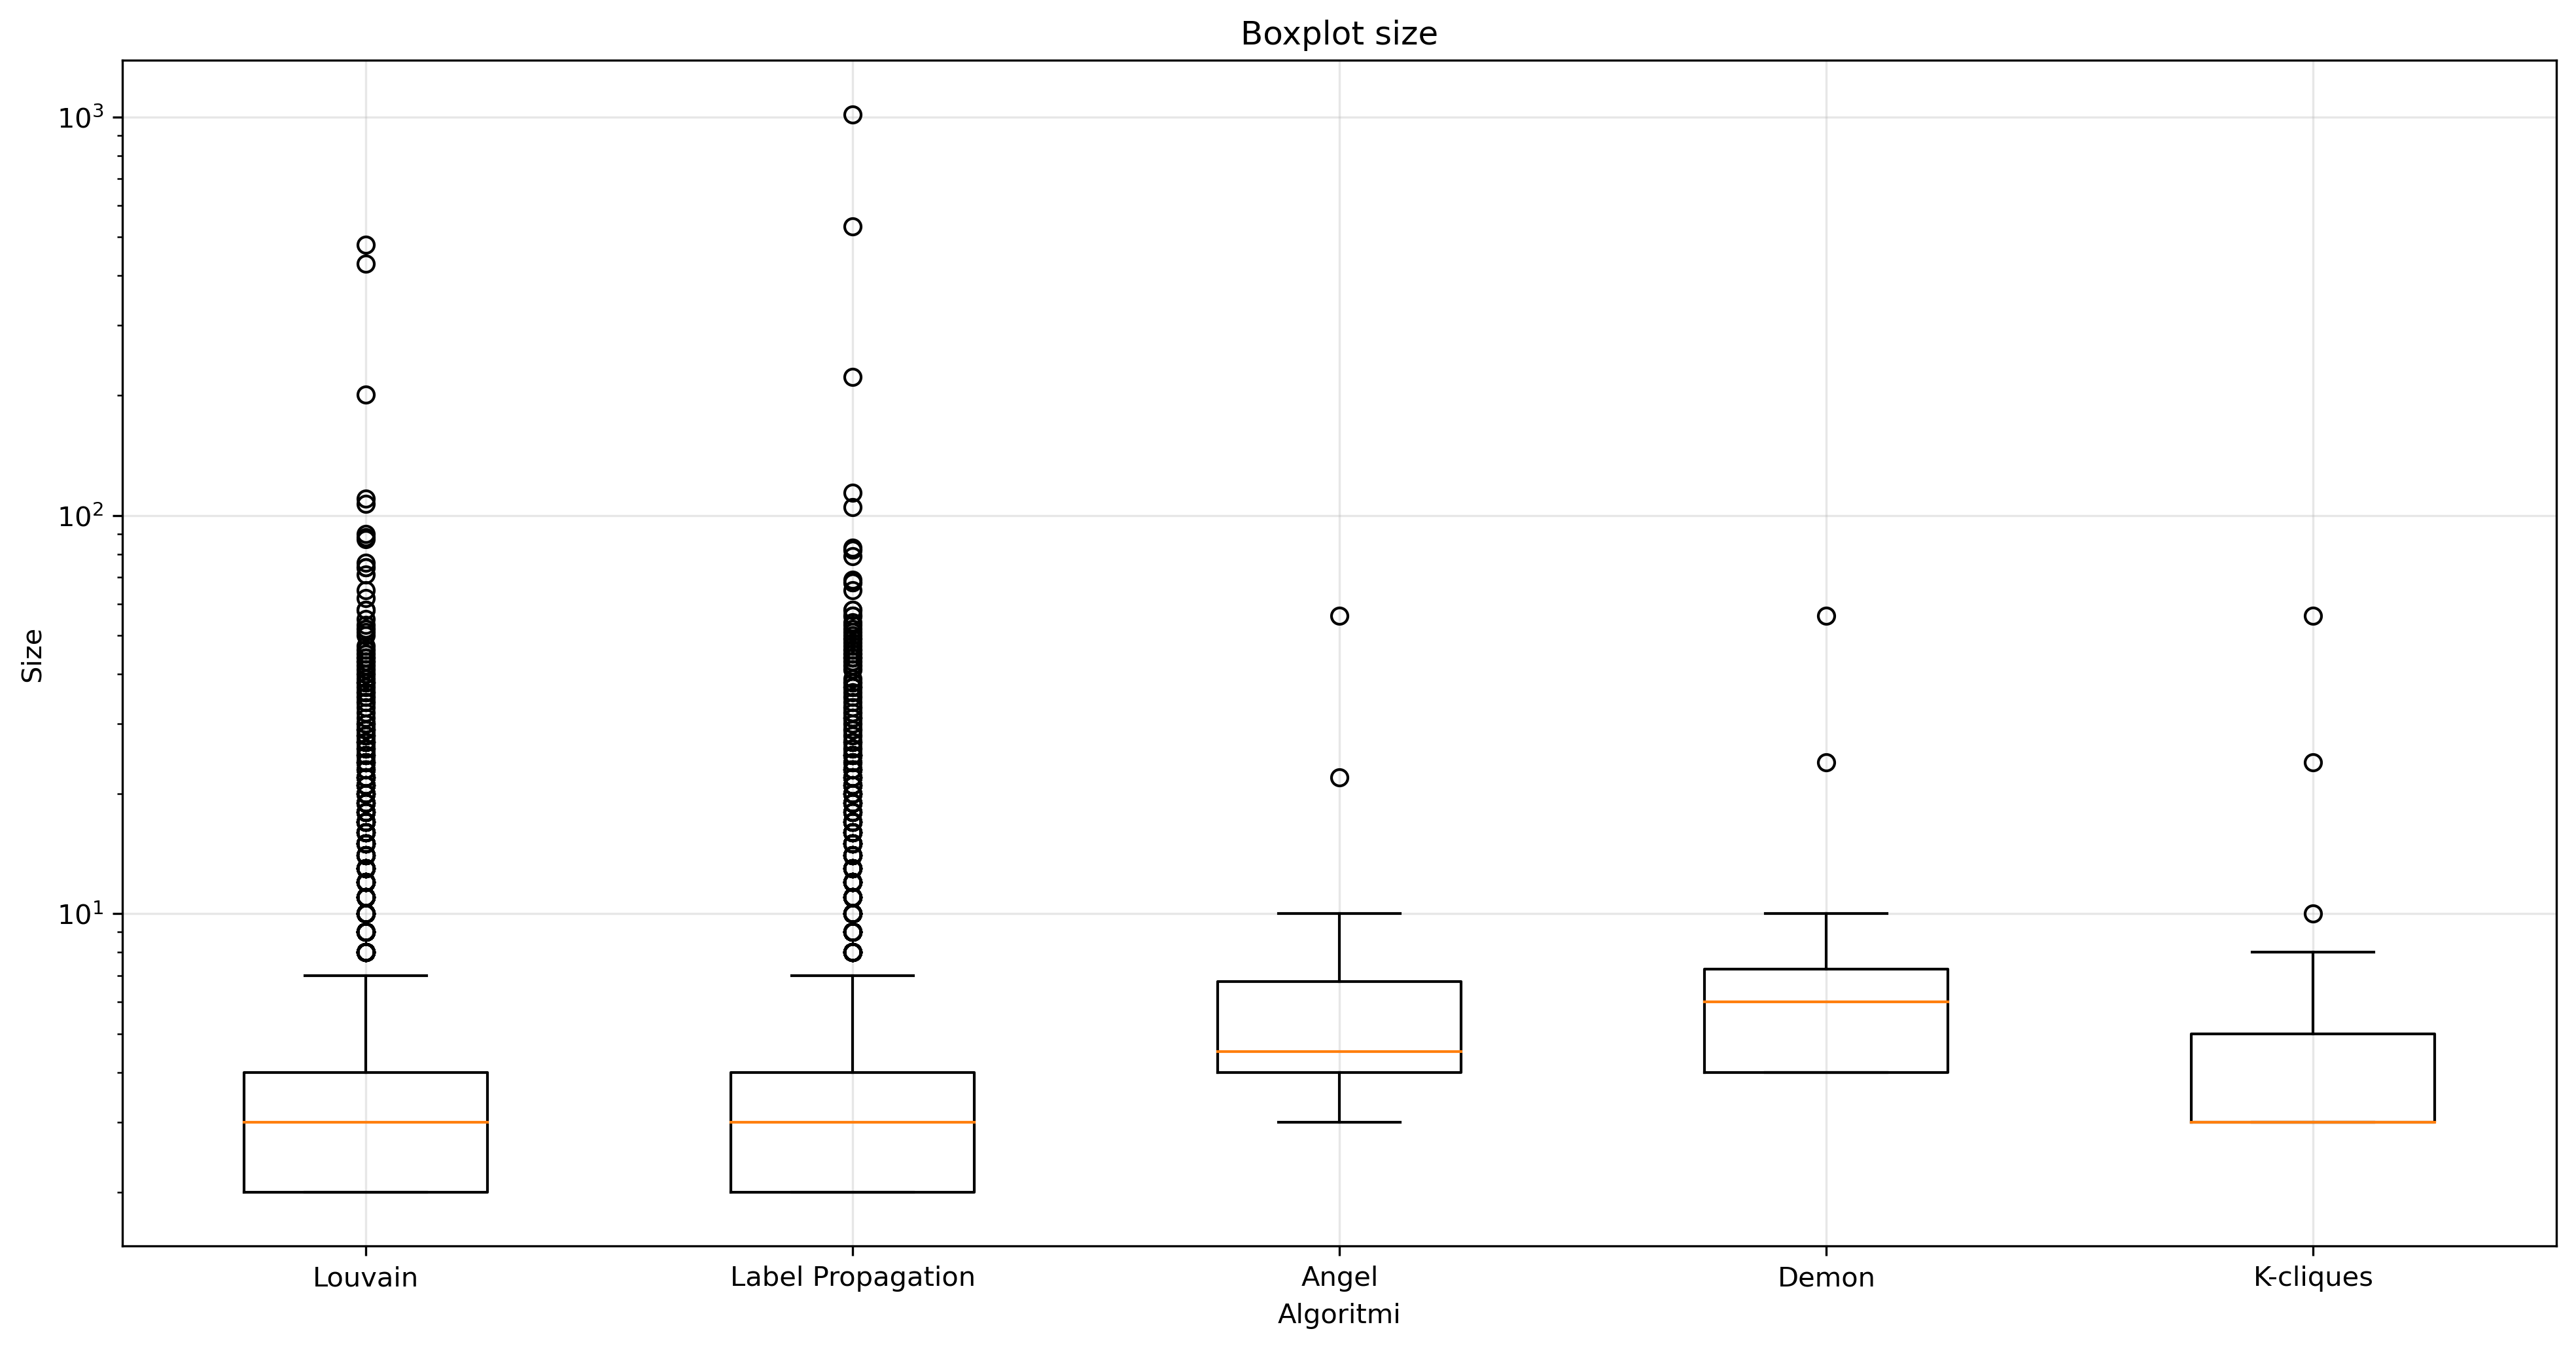

In [220]:
plot_boxplot(list_size)

## Community Discorvery on single time step
to perform topic modeling

### Louvain

In [193]:
df1 = pd.read_csv("../data_collection/data_biden/df_primoSemestre.csv", skipinitialspace=True, na_values='?', keep_default_na=True)
df2 = pd.read_csv("../data_collection/data_biden/df_secondoSemestre.csv", skipinitialspace=True, na_values='?', keep_default_na=True)
df3 = pd.read_csv("../data_collection/data_biden/df_terzoSemestre.csv", skipinitialspace=True, na_values='?', keep_default_na=True)
df4 = pd.read_csv("../data_collection/data_biden/df_quartoSemestre.csv", skipinitialspace=True, na_values='?', keep_default_na=True)
df5 =pd.read_csv("../data_collection/data_biden/df_quintoSemestre.csv", skipinitialspace=True, na_values='?', keep_default_na=True)
df1

,Unnamed: 0,username_mittente,id_mittente,username_ricevente,id_ricevente,semestre,weights
0,0,lisaisme85,2900247904,realDonaldTrump,25073877,1.0,1.000000
1,1,lisaisme85,2900247904,JoeBiden,939091,1.0,0.944444
2,2,healthybuttrfly,99532356,Alyssa_Milano,26642006,1.0,0.722222
3,3,mistert_333,798687837054828544,realDonaldTrump,25073877,1.0,0.666667
4,4,electiledysfx,1210976097329745925,JoeBiden,939091,1.0,0.666667
...,...,...,...,...,...,...,...
11799,11799,glenthecreator,894200148015943684,eye_steal_memes,1252393901006225408,1.0,0.000000
11800,11800,glenthecreator,894200148015943684,realDonaldTrump,25073877,1.0,0.000000
11801,11801,glesadedeaux,563467174,EquipoTrump,1245414763745677312,1.0,0.000000
11802,11802,glesadedeaux,563467174,GOPChairwoman,2353605901,1.0,0.000000


In [194]:
del df1['Unnamed: 0']
del df1['id_mittente']
del df1['id_ricevente']
del df1['semestre']

In [195]:
del df2['Unnamed: 0']
del df2['id_mittente']
del df2['id_ricevente']
del df2['semestre']

del df3['Unnamed: 0']
del df3['id_mittente']
del df3['id_ricevente']
del df3['semestre']

del df4['Unnamed: 0']
del df4['id_mittente']
del df4['id_ricevente']
del df4['semestre']

del df5['Unnamed: 0']
del df5['id_mittente']
del df5['id_ricevente']
del df5['semestre']

In [196]:
df1.username_mittente = df1.username_mittente.astype(str)
df1.username_ricevente = df1.username_ricevente.astype(str)
df2.username_mittente = df2.username_mittente.astype(str)
df2.username_ricevente = df2.username_ricevente.astype(str)
df3.username_mittente = df3.username_mittente.astype(str)
df3.username_ricevente = df3.username_ricevente.astype(str)
df4.username_mittente = df4.username_mittente.astype(str)
df4.username_ricevente = df4.username_ricevente.astype(str)
df5.username_mittente = df5.username_mittente.astype(str)
df5.username_ricevente = df5.username_ricevente.astype(str)


In [197]:
g1 = nx.from_pandas_edgelist(df1, source="username_mittente", target = "username_ricevente", create_using=nx.MultiDiGraph(), edge_attr = "weights")
g1 = g1.to_undirected() 

g2 = nx.from_pandas_edgelist(df2, source="username_mittente", target = "username_ricevente", create_using=nx.MultiDiGraph(), edge_attr = "weights")
g2 = g2.to_undirected() 

g3 = nx.from_pandas_edgelist(df3, source="username_mittente", target = "username_ricevente", create_using=nx.MultiDiGraph(), edge_attr = "weights")
g3 = g3.to_undirected() 

g4 = nx.from_pandas_edgelist(df4, source="username_mittente", target = "username_ricevente", create_using=nx.MultiDiGraph(), edge_attr = "weights")
g4 = g4.to_undirected() 

g5 = nx.from_pandas_edgelist(df5, source="username_mittente", target = "username_ricevente", create_using=nx.MultiDiGraph(), edge_attr = "weights")
g5 = g5.to_undirected() 


In [198]:
louvain_coms1 = algorithms.louvain(g1, resolution = 0.7, weight = 'weights')
louvain_coms2 = algorithms.louvain(g2, resolution = 0.7, weight = 'weights')
louvain_coms3 = algorithms.louvain(g3, resolution = 0.7, weight = 'weights')
louvain_coms4 = algorithms.louvain(g4, resolution = 0.7, weight = 'weights')
louvain_coms5 = algorithms.louvain(g5, resolution = 0.7, weight = 'weights')


In [221]:
print_results(louvain_coms1, "Louvain g1")
print()
print('--------------------------')
print()
print_results(louvain_coms2, "Louvain g2")
print()
print('--------------------------')
print()
print_results(louvain_coms3, "Louvain g3")
print()
print('--------------------------')
print()
print_results(louvain_coms4, "Louvain g4")
print()
print('--------------------------')
print()
print_results(louvain_coms5, "Louvain g5")

Node coverage:  1.0
Number of nodes:  FitnessResult(min=2, max=348, score=4.625872249060655, std=10.698278262749682)
Average internal degree:  FitnessResult(min=1.0, max=2.6666666666666665, score=1.2921025643074842, std=0.3086433101281025)
Internal edge density:  FitnessResult(min=0.00645930636986982, max=1.0, score=0.7116866752043788, std=0.30055457571357047)
Conductance:  FitnessResult(min=0.0, max=0.8823529411764706, score=0.32862543746603645, std=0.2310682364457476)
Newman Girvan modularity:  FitnessResult(min=None, max=None, score=0.5729140602275954, std=None)

--------------------------

Node coverage:  1.0
Number of nodes:  FitnessResult(min=2, max=292, score=4.631710362047441, std=10.629461951072283)
Average internal degree:  FitnessResult(min=1.0, max=3.111111111111111, score=1.2776373823798188, std=0.3088109656502363)
Internal edge density:  FitnessResult(min=0.006872852233676976, max=1.0, score=0.7257374686198644, std=0.30118476174783837)
Conductance:  FitnessResult(min=0.0,

### Label Propagation

In [200]:
labelProp_coms1 = algorithms.label_propagation(g1)
labelProp_coms2 = algorithms.label_propagation(g2)
labelProp_coms3 = algorithms.label_propagation(g3)
labelProp_coms4 = algorithms.label_propagation(g4)
labelProp_coms5 = algorithms.label_propagation(g5)

In [222]:
print_results(labelProp_coms1, "Label Propagation g1")
print()
print('--------------------------')
print()
print_results(labelProp_coms2, "Label Propagation g2")
print()
print('--------------------------')
print()
print_results(labelProp_coms3, "Label Propagation g3")
print()
print('--------------------------')
print()
print_results(labelProp_coms4, "Label Propagation g4")
print()
print('--------------------------')
print()
print_results(labelProp_coms5, "Label Propagation g5")

Node coverage:  1.0
Number of nodes:  FitnessResult(min=2, max=1413, score=5.0397660818713454, std=34.49464146796951)
Average internal degree:  FitnessResult(min=1.0, max=3.2498230714791223, score=1.2805783474004782, std=0.3064760889196663)
Internal edge density:  FitnessResult(min=0.0023015744132288403, max=1.0, score=0.7234455694513546, std=0.29552033921221305)
Conductance:  FitnessResult(min=0.0, max=0.8, score=0.2867987935685725, std=0.20659905459500708)
Newman Girvan modularity:  FitnessResult(min=None, max=None, score=0.5849076476554136, std=None)

--------------------------

Node coverage:  1.0
Number of nodes:  FitnessResult(min=2, max=479, score=4.52991452991453, std=14.668748482538549)
Average internal degree:  FitnessResult(min=1.0, max=3.142857142857143, score=1.2570725847442745, std=0.30327396670179413)
Internal edge density:  FitnessResult(min=0.005424480918230973, max=1.0, score=0.7473138914288356, std=0.2921833923072971)
Conductance:  FitnessResult(min=0.0, max=0.875, s

### Evaluation

In [223]:
#the higher the NMI the more similar the compared partitons are
#Both partitions should cover the same node set
evaluation.normalized_mutual_information(louvain_coms1, labelProp_coms1)

MatchingResult(score=0.9072251566359683, std=None)

In [224]:
evaluation.normalized_mutual_information(louvain_coms2, labelProp_coms2)

MatchingResult(score=0.9410667189423291, std=None)

In [225]:
evaluation.normalized_mutual_information(louvain_coms3, labelProp_coms3)

MatchingResult(score=0.9621465063746284, std=None)

In [226]:
evaluation.normalized_mutual_information(louvain_coms4, labelProp_coms4)

MatchingResult(score=0.9739837883754362, std=None)

In [227]:
evaluation.normalized_mutual_information(louvain_coms5, labelProp_coms5)

MatchingResult(score=0.975376773448123, std=None)

In [228]:
stampaCommunity(louvain_coms1)

Comunita' totali: 1863
Nodi: 8618


In [230]:
stampaCommunity(louvain_coms2)

Comunita' totali: 1602
Nodi: 7420


In [231]:
stampaCommunity(louvain_coms3)

Comunita' totali: 1098
Nodi: 4660


In [232]:
stampaCommunity(louvain_coms4)

Comunita' totali: 977
Nodi: 4025


In [233]:
stampaCommunity(louvain_coms5)

Comunita' totali: 880
Nodi: 3521


## Exporting Louvain communities for each time step

In [234]:
from cdlib import readwrite


In [235]:
readwrite.write_community_csv(louvain_coms1, "../data_collection/data_biden/CD_louvain1.csv", ",")
readwrite.write_community_csv(louvain_coms2, "../data_collection/data_biden/CD_louvain2.csv", ",")
readwrite.write_community_csv(louvain_coms3, "../data_collection/data_biden/CD_louvain3.csv", ",")
readwrite.write_community_csv(louvain_coms4, "../data_collection/data_biden/CD_louvain4.csv", ",")
readwrite.write_community_csv(louvain_coms5, "../data_collection/data_biden/CD_louvain5.csv", ",")

In [247]:
df_coms1 = pd.read_csv("../data_collection/data_biden/CD_louvain1.csv")
df_coms2 = pd.read_csv("../data_collection/data_biden/CD_louvain2.csv")
df_coms3 = pd.read_csv("../data_collection/data_biden/CD_louvain3.csv")
df_coms4 = pd.read_csv("../data_collection/data_biden/CD_louvain4.csv")
df_coms5 = pd.read_csv("../data_collection/data_biden/CD_louvain5.csv")

In [248]:
df_coms_T1 = df_coms1.transpose()
df_coms_T2 = df_coms2.transpose()
df_coms_T3 = df_coms3.transpose()
df_coms_T4 = df_coms4.transpose()
df_coms_T5 = df_coms5.transpose()

df_coms_T1

,0,1,2,3,4,5,6,7,8,9,...,1852,1853,1854,1855,1856,1857,1858,1859,1860,1861
JoeBiden,realDonaldTrump,letshearthetru,moogoo3544,lazyzimms,BernieSanders,dcfairbank,seanrohan32,peaceanonredux,YourFriendZippy,blesamerica,...,frankfnbgrp,france24_en,goodtasteart,gmouryas,gnucgraph,goliod26,girlofsc,gimme1,gin_sol,globalseangmai1
dmaga101,zemanlynnz,nwlc,cvpayne,Derameth,muertemariposa,4aPeoplesParty,PKHarrington,celtgunn,shim_oz,RealClearNews,...,colinkalmbacher,cathyruthi,real_defender,cjtruth,jon_barron,FrankelJeremy,badlandz_MaLa,philosogoddess,BrynnTannehill,Manny_Funes
BarackObama,kbanuba,melliflora,SandraSmithFox,HouseGOP,boniver,HardLensMedia,CarlyJA22,cocobutt07,artspeakcentral,csthetruth,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
schatto3,frensfrens,knowyourIX,edhenry,TKeeton,sopharela,LeeCamp,Natalie_Resist,donnie_maga,kip73563260,rushlimbaugh,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AOC,oppose45,kcjohnson9,TeamCavuto,TeresaM24212961,grfrog1,StatusCoup,Batvan82,grabaroot,Temidor,true_pundit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
galeriemadchen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
goliathdave,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gideonneptune,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
glensteen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [249]:
df_coms1 = df_coms_T1.rename_axis('community_0').reset_index()
df_coms2 = df_coms_T2.rename_axis('community_0').reset_index()
df_coms3 = df_coms_T3.rename_axis('community_0').reset_index()
df_coms4 = df_coms_T4.rename_axis('community_0').reset_index()
df_coms5 = df_coms_T5.rename_axis('community_0').reset_index()

In [260]:
lista_nomi_colonne1 = []
for i in range(len(df_coms1.columns)):
    stringa_nome_col = "community_" + str(i)
    lista_nomi_colonne1.append(stringa_nome_col)

In [265]:
lista_nomi_colonne2 = []
for i in range(len(df_coms2.columns)):
    stringa_nome_col = "community_" + str(i)
    lista_nomi_colonne2.append(stringa_nome_col)

In [261]:
lista_nomi_colonne3 = []
for i in range(len(df_coms3.columns)):
    stringa_nome_col = "community_" + str(i)
    lista_nomi_colonne3.append(stringa_nome_col)

In [262]:
lista_nomi_colonne4 = []
for i in range(len(df_coms4.columns)):
    stringa_nome_col = "community_" + str(i)
    lista_nomi_colonne4.append(stringa_nome_col)

In [263]:
lista_nomi_colonne5 = []
for i in range(len(df_coms5.columns)):
    stringa_nome_col = "community_" + str(i)
    lista_nomi_colonne5.append(stringa_nome_col)

In [266]:
df_coms1.columns = lista_nomi_colonne1
df_coms2.columns = lista_nomi_colonne2
df_coms3.columns = lista_nomi_colonne3
df_coms4.columns = lista_nomi_colonne4
df_coms5.columns = lista_nomi_colonne5

In [273]:
df_coms1

,community_0,community_1,community_2,community_3,community_4,community_5,community_6,community_7,community_8,community_9,...,community_1853,community_1854,community_1855,community_1856,community_1857,community_1858,community_1859,community_1860,community_1861,community_1862
0,JoeBiden,realDonaldTrump,letshearthetru,moogoo3544,lazyzimms,BernieSanders,dcfairbank,seanrohan32,peaceanonredux,YourFriendZippy,...,frankfnbgrp,france24_en,goodtasteart,gmouryas,gnucgraph,goliod26,girlofsc,gimme1,gin_sol,globalseangmai1
1,dmaga101,zemanlynnz,nwlc,cvpayne,Derameth,muertemariposa,4aPeoplesParty,PKHarrington,celtgunn,shim_oz,...,colinkalmbacher,cathyruthi,real_defender,cjtruth,jon_barron,FrankelJeremy,badlandz_MaLa,philosogoddess,BrynnTannehill,Manny_Funes
2,BarackObama,kbanuba,melliflora,SandraSmithFox,HouseGOP,boniver,HardLensMedia,CarlyJA22,cocobutt07,artspeakcentral,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,schatto3,frensfrens,knowyourIX,edhenry,TKeeton,sopharela,LeeCamp,Natalie_Resist,donnie_maga,kip73563260,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AOC,oppose45,kcjohnson9,TeamCavuto,TeresaM24212961,grfrog1,StatusCoup,Batvan82,grabaroot,Temidor,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,galeriemadchen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
344,goliathdave,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
345,gideonneptune,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
346,glensteen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [272]:
df_coms1.to_csv("../data_collection/data_biden/Community_Louvain1.csv",  index=False)
df_coms2.to_csv("../data_collection/data_biden/Community_Louvain2.csv",  index=False)
df_coms3.to_csv("../data_collection/data_biden/Community_Louvain3.csv",  index=False)
df_coms4.to_csv("../data_collection/data_biden/Community_Louvain4.csv",  index=False)
df_coms5.to_csv("../data_collection/data_biden/Community_Louvain5.csv",  index=False)